In [1]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import datetime as dt

In [2]:
# Import .csv file as a dataframe
data = pd.read_csv('human-resources-data-set/core_dataset.csv')

# Count number of observations and features
obs, nvar = data.shape
print('Number of Individuals (all): {x:}'.format(x=obs))
print('Number of variables: {x:}'.format(x=nvar))

# View table
data=data.drop(301,axis=0)
data.tail()

Number of Individuals (all): 302
Number of variables: 21


,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
296,"Patronick, Luke",1.112031e+09,MA,1844.0,2/20/1979,38.0,Male,Single,US Citizen,No,...,11/7/2011,9/7/2015,Another position,Voluntarily Terminated,Software Engineering,Software Engineer,52.25,Alex Sweetwater,Diversity Job Fair,Exceeds
297,"Saada, Adell",1.012023e+09,MA,2132.0,7/24/1986,31.0,Female,Married,US Citizen,No,...,11/5/2012,NaN,N/A - still employed,Active,Software Engineering,Software Engineer,49.25,Alex Sweetwater,Pay Per Click - Google,Fully Meets
298,"Szabo, Andrew",1.201031e+09,MA,2140.0,5/6/1983,34.0,Male,Single,US Citizen,No,...,7/7/2014,NaN,N/A - still employed,Active,Software Engineering,Software Engineer,48.00,Alex Sweetwater,MBTA ads,Exceptional
299,"True, Edward",1.102024e+09,MA,2451.0,6/14/1983,34.0,Male,Single,Non-Citizen,No,...,2/18/2013,4/15/2014,medical issues,Voluntarily Terminated,Software Engineering,Software Engineer,45.42,Alex Sweetwater,Diversity Job Fair,Fully Meets
300,"Sweetwater, Alex",1.001645e+09,MA,2184.0,11/22/1966,51.0,Male,Single,US Citizen,No,...,8/15/2011,NaN,N/A - still employed,Active,Software Engineering,Software Engineering Manager,27.00,Jennifer Zamora,Search Engine - Google Bing Yahoo,Fully Meets


Need to clean up the data here, Check # of entries for each column and rewrite/add missing data etc...

In [3]:
#Replace the ugly column headers with something that is easier to work with. 
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/','_')

In [4]:
#make all dates the same format.
data.date_of_hire=data.date_of_hire.str.replace('/','.')
data.date_of_termination=data.date_of_termination.str.replace('/','.')
data.dob=data.dob.str.replace('/','.')
data['dob']=pd.to_datetime(data['dob'])
data['date_of_hire']=pd.to_datetime(data['date_of_hire'])
data['date_of_termination']=pd.to_datetime(data['date_of_termination'])
print(data.dtypes)


employee_name                  object
employee_number               float64
state                          object
zip                           float64
dob                    datetime64[ns]
age                           float64
sex                            object
maritaldesc                    object
citizendesc                    object
hispanic_latino                object
racedesc                       object
date_of_hire           datetime64[ns]
date_of_termination    datetime64[ns]
reason_for_term                object
employment_status              object
department                     object
position                       object
pay_rate                      float64
manager_name                   object
employee_source                object
performance_score              object
dtype: object


In [5]:
#Making sure string entries are uniform (caps or not, useless spaces on end)
data.sex=data.sex.str.strip().str.capitalize()
data.maritaldesc=data.maritaldesc.str.strip().str.capitalize()
data.hispanic_latino=data.hispanic_latino.str.strip().str.capitalize()
data.department=data.department.str.strip()

In [6]:
data[data.employee_number.duplicated()]
#Two employees with the same number, this can create problems. Decision: Assign New number to one 

,employee_name,employee_number,state,zip,dob,age,sex,maritaldesc,citizendesc,hispanic_latino,...,date_of_hire,date_of_termination,reason_for_term,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score
153,"Ndzi, Horia",1.204033e+09,MA,2421.0,1983-03-28,34.0,Male,Married,US Citizen,No,...,2013-04-01,2016-05-25,more money,Voluntarily Terminated,Production,Production Technician I,22.0,Amy Dunn,Employee Referral,Fully Meets


Checking for Unique values in columns, this already gives a lot of information:

In [7]:
data.loc[152,'employee_number']+=1

In [8]:
for col in data.columns:
    print(data[col].unique())
    print(data[col].nunique())

['Brown, Mia' 'LaRotonda, William  ' 'Steans, Tyrone  ' 'Howard, Estelle'
 'Singh, Nan ' 'Smith, Leigh Ann' 'LeBlanc, Brandon  R' 'Quinn, Sean'
 'Boutwell, Bonalyn' 'Foster-Baker, Amy' 'King, Janet' 'Zamora, Jennifer'
 'Becker, Renee' 'Goble, Taisha' 'Hernandez, Daniff' 'Horton, Jayne'
 'Johnson, Noelle ' 'Murray, Thomas' 'Pearson, Randall'
 'Petrowsky, Thelma' 'Roby, Lori ' 'Rogers, Ivan' 'Salter, Jason'
 'Simard, Kramer' 'Zhou, Julia' 'Foss, Jason' 'Roup,Simon' 'Ruiz, Ricardo'
 'Monroe, Peter' 'Dougall, Eric' 'Clayton, Rick' 'Galia, Lisa'
 'Lindsay, Leonara ' 'Soto, Julia ' 'Bacong, Alejandro ' 'Cisco, Anthony'
 'Dolan, Linda' 'Gonzalez, Maria' 'Merlos, Carlos' 'Morway, Tanya'
 'Shepard, Anita ' 'Tredinnick, Neville ' 'Turpin, Jumil'
 'Ait Sidi, Karthikeyan   ' 'Carr, Claudia  N' 'Favis, Donald  '
 'Roehrich, Bianca' 'Daniele, Ann  ' 'Lajiri,  Jyoti'
 'Semizoglou, Jeremiah  ' 'South, Joe' 'Warfield, Sarah' 'Bramante, Elisa'
 'Albert, Michael  ' 'Bozzi, Charles' 'Butler, Webster  L' '

In [9]:
#Double Check to make sure there are no dodgy situations
print(data[((data['employment_status'] == 'Voluntarily Terminated')|(data['employment_status'] == 'Terminated for Cause'))& (data.date_of_termination.isnull())])
print(data[((data['employment_status'] == 'Active')|(data['employment_status'] == 'Leave of Absence')|(data['employment_status'] == 'Future Start'))& (data.date_of_termination.notnull())])
print(data[((data['employment_status'] == 'Terminated for Cause'))& (data.reason_for_term=='hours')])
print(data[((data['employment_status'] == 'Voluntarily Terminated'))& (data.reason_for_term=='performance')])
print(data[((data['employment_status'] == 'Voluntarily Terminated'))& (data.reason_for_term=='attendance')])

Empty DataFrame
Columns: [employee_name, employee_number, state, zip, dob, age, sex, maritaldesc, citizendesc, hispanic_latino, racedesc, date_of_hire, date_of_termination, reason_for_term, employment_status, department, position, pay_rate, manager_name, employee_source, performance_score]
Index: []

[0 rows x 21 columns]
     employee_name  employee_number state     zip        dob   age     sex  \
3  Howard, Estelle     1.211051e+09    MA  2170.0 1985-09-16  32.0  Female   

  maritaldesc citizendesc hispanic_latino  ... date_of_hire  \
3     Married  US Citizen              No  ...   2015-02-16   

  date_of_termination       reason_for_term employment_status     department  \
3          2015-04-15  N/A - still employed            Active  Admin Offices   

                   position pay_rate        manager_name  \
3  Administrative Assistant     21.5  Brandon R. LeBlanc   

          employee_source         performance_score  
3  Pay Per Click - Google  N/A- too early to review  

[

In [10]:
#Removing the termination date for the active employee
data.loc[3,'date_of_termination']=pd.NaT
#Turning voluntary into caused for reasons: performance and attendance
data.loc[[18,172],'reason_for_term']='Terminated for Cause'
#Turning cause into voluntary for reasons: hours
data.loc[45,'reason_for_term']='Voluntarily Terminated'

In [11]:
# Are they empty cells? Look for Just spaces and NaN
for i in range(len(data.columns)-1):
    counter = data.iloc[:,i].isnull().sum()
    for j in range(len(data)-1):
        if (data.iloc[j,i]==' '):
            counter += 1        
    print('Empty cells in {f:}: {n:}'.format(f=data.columns[i], n=counter))

Empty cells in employee_name: 0
Empty cells in employee_number: 0
Empty cells in state: 0
Empty cells in zip: 0
Empty cells in dob: 0
Empty cells in age: 0
Empty cells in sex: 0
Empty cells in maritaldesc: 0
Empty cells in citizendesc: 0
Empty cells in hispanic_latino: 0
Empty cells in racedesc: 0
Empty cells in date_of_hire: 0
Empty cells in date_of_termination: 199
Empty cells in reason_for_term: 0
Empty cells in employment_status: 0
Empty cells in department: 0
Empty cells in position: 0
Empty cells in pay_rate: 0
Empty cells in manager_name: 0
Empty cells in employee_source: 0


Correct, there are no missing cells except in the termination date data. 

Converting the performance into a score so one can compare. 

In [12]:
order=['N/A- too early to review','PIP','Needs Improvement','90-day meets','Fully Meets','Exceeds','Exceptional']
data["performance_score"] = data["performance_score"].astype('category',ordered=True,categories=order).cat.codes

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3291: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
#Save core dataset, but keep working in this notebook as all the datetime will be reverted if re-importing
data.to_csv(r'/Users/saschafrey/Documents/EPFL/MA2/Data Science/DSIP/clean_core.csv')

# 1. Looking for ROI of recruitment activities

In [20]:
#Import recruitment costs for the different channels.
rec=pd.read_csv('human-resources-data-set/recruiting_costs.csv',index_col=0)

In [21]:
#Create new column that is supposed to represent value of an employee. 
pd.to_numeric(data.performance_score)
data['tenure']=data['date_of_termination'].fillna(dt.datetime(2016,7,1))-data['date_of_hire']
data['tenure']=data['tenure'].dt.days
data['return']=data['pay_rate']*data['performance_score'].replace(0,3)*data['tenure']

In [67]:
rec['return_mean']=data[['return','employee_source']].groupby('employee_source').mean()['return']
rec['return_sum']=data[['return','employee_source']].groupby('employee_source').sum()['return']
rec.return_sum=rec.return_sum/(rec.return_sum.max()-rec.return_sum.min())*10000
rec['ROI']=rec['return_sum']/(rec['Total'].replace(0,1))

In [78]:
rec1=rec[rec['Total']!=0]
#Choosing those sources with or without costs--> Can export accordingly

In [43]:
rec[['Total','return_mean','return_sum','ROI']].to_csv(r'/Users/saschafrey/Documents/EPFL/MA2/Data Science/DSIP/ROI.csv')

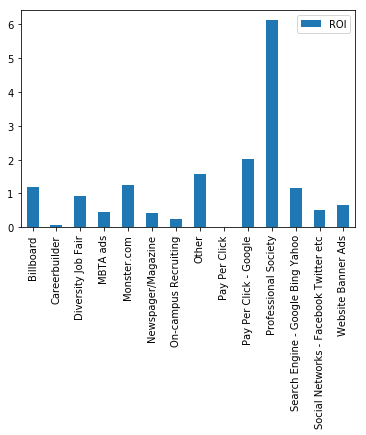

In [79]:
rec1.plot.bar(y='ROI')

# 4. Looking if there is fair compensation for employees

In [84]:
pay=pd.read_csv('human-resources-data-set/salary_grid.csv',index_col=0)

In [97]:
data['rel_pay']=data['pay_rate']/data['position'].map(pay.mid_hr)

In [106]:
pay = data.drop(columns=['employee_name','dob','employee_number','date_of_hire','date_of_termination','reason_for_term','employment_status','department','position','manager_name'])
pay=pay[pay['rel_pay'].notnull()]

In [117]:
pay.groupby('hispanic_latino').mean()

,zip,age,pay_rate,performance_score,tenure,return,mid_pay,rel_pay
hispanic_latino,,,,,,,,
No,2497.682464,38.454976,24.226588,3.232227,921.933649,79223.762180,22.814976,1.048086
Yes,2187.047619,36.952381,25.057143,3.238095,803.714286,69587.145238,23.862381,1.030527


In [124]:
pay.to_csv(r'/Users/saschafrey/Documents/EPFL/MA2/Data Science/DSIP/Project/pay.csv')